<a href="https://colab.research.google.com/gist/DanielCruzRodrigues/b76c7625124abbe6da472c4bd557a694/casegames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/PS4_GamesSales.csv', encoding = 'latin-1')

In [ ]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
df.shape

(1034, 9)

In [ ]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

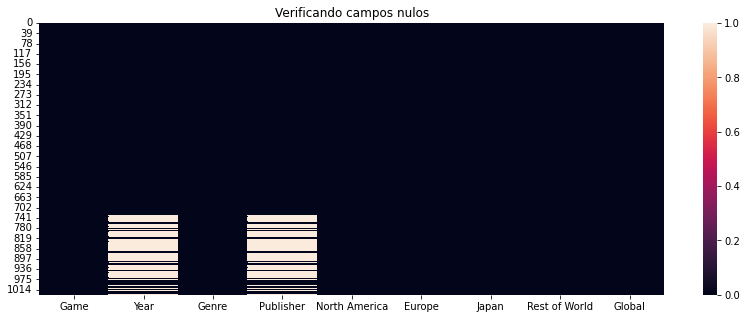

In [ ]:
plt.figure(figsize = (14,5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull())


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [ ]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


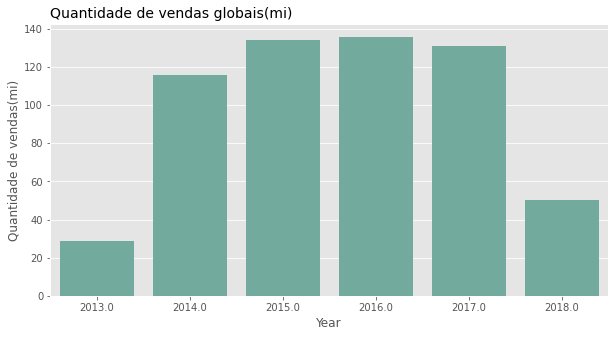

In [ ]:
plt.figure(figsize = (10,5))
plt.title('Quantidade de vendas globais(mi)', loc='left', fontsize=14)
sns.barplot(data = df , x='Year', y ='Global',ci=None , color='#69b3a2',estimator = sum)

plt.ylabel('Quantidade de vendas(mi)');

In [ ]:
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


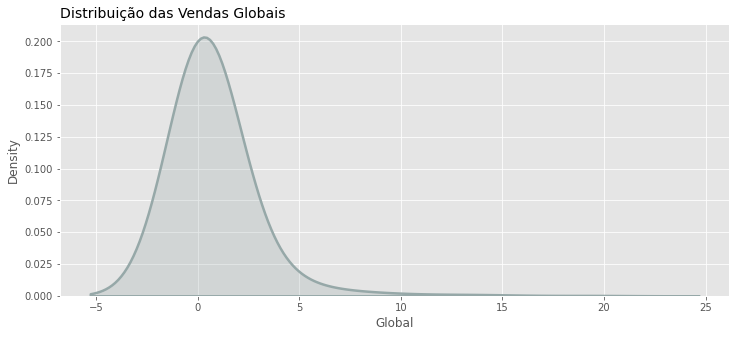

In [ ]:
plt.figure(figsize = (12,5));
plt.style.use('ggplot');
plt.title('Distribuição das Vendas Globais',loc = 'left', fontsize = 14);
sns.kdeplot(df['Global'],shade = True, bw=1,color='#96a8a8',linewidth = 2.5);

In [ ]:
df.groupby(by = ['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


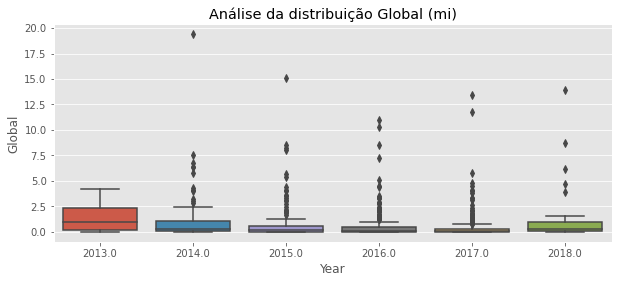

In [ ]:
plt.figure(figsize = (10,4))
plt.title('Análise da distribuição Global (mi)')
sns.boxplot(data=df , x='Year',y='Global');

In [ ]:
dfg = df.loc[df['Global']>=10]

In [ ]:
dfg.describe().sum()

Year             12104.988043
North America       33.902899
Europe              50.168589
Japan                8.989738
Rest of World       20.444098
Global              92.640070
dtype: float64

In [ ]:
Analise = df.groupby( by=['Year'] ).sum().reset_index()

In [ ]:
America =[ America/Total *100 for America, Total in zip(Analise["North America"],Analise["Global"] )]
Europa =[ Europa/Total *100 for Europa, Total in zip(Analise["Europe"],Analise["Global"] )];
Japao = [ Japao/Total *100 for Japao, Total in zip(Analise["Japan"],Analise["Global"] )];
Mundo = [ Mundo/Total *100 for Mundo, Total in zip(Analise["Rest of World"],Analise["Global"] )]


In [ ]:
America , Europa , Japao,Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

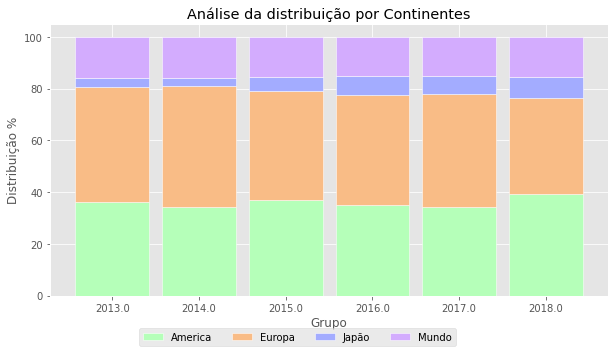

In [ ]:
plt.figure(figsize = (10,5))
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]
plt.title("Análise da distribuição por Continentes")
plt.bar(Grupos,America,width=Largura_Barra,color='#b5ffb9',edgecolor='white')
plt.bar(Grupos,Europa,bottom =America ,width=Largura_Barra,color='#f9bc86',edgecolor='white')
plt.bar(Grupos,Japao,bottom = [A+B for A,B in zip(America,Europa)],width=Largura_Barra,color='#a3acff',edgecolor='white')
plt.bar(Grupos,Mundo,bottom = [A+B+C for A,B,C in zip(America,Europa,Japao)],width=Largura_Barra,color='#d3acfe',edgecolor='white')
plt.xticks(Grupos,Rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend(["America",'Europa','Japão','Mundo'],loc='upper left',bbox_to_anchor = (0.15,-0.1),ncol=4);

In [ ]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [ ]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()
df['Produtor']=Funcao_Label.fit_transform(df['Publisher'])
df['Genero']=Funcao_Label.fit_transform(df['Genre'])
df['Jogo']=Funcao_Label.fit_transform(df['Game'])

In [ ]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [ ]:
Paleta_Cores = sns.color_palette('husl',15)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

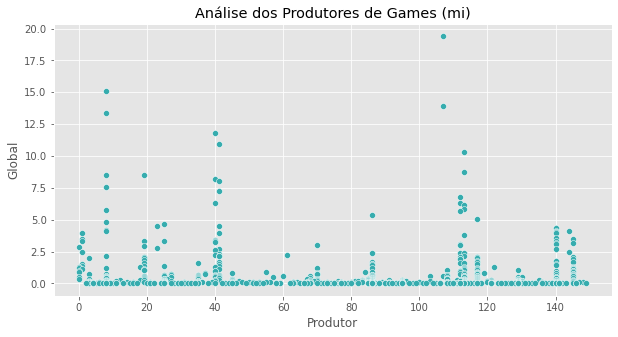

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Análise dos Produtores de Games (mi)")
sns.scatterplot(data=df,x='Produtor',y='Global',color=Paleta_Cores[8]);

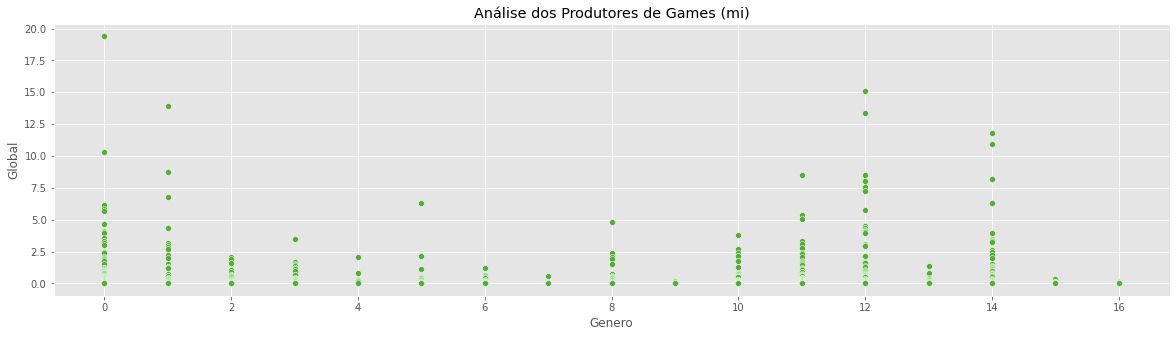

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Análise dos Produtores de Games (mi)")
sns.scatterplot(data=df,x='Genero',y='Global',color=Paleta_Cores[5]);

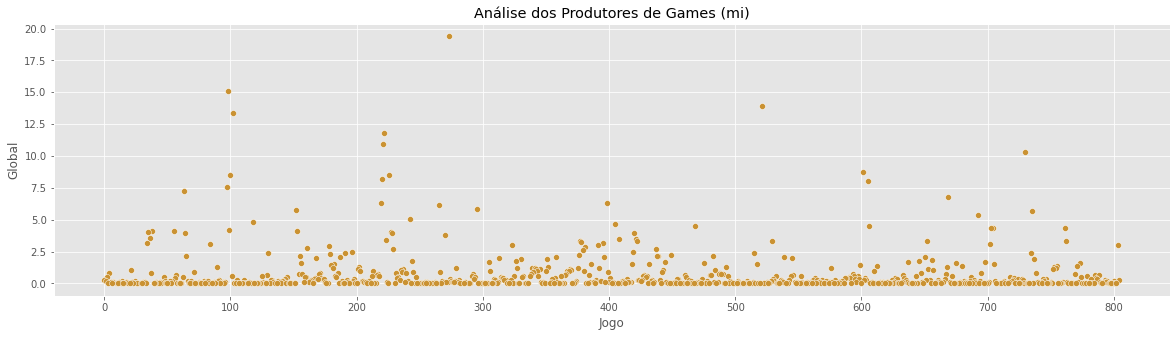

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Análise dos Produtores de Games (mi)")
sns.scatterplot(data=df,x='Jogo',y='Global',color=Paleta_Cores[2]);

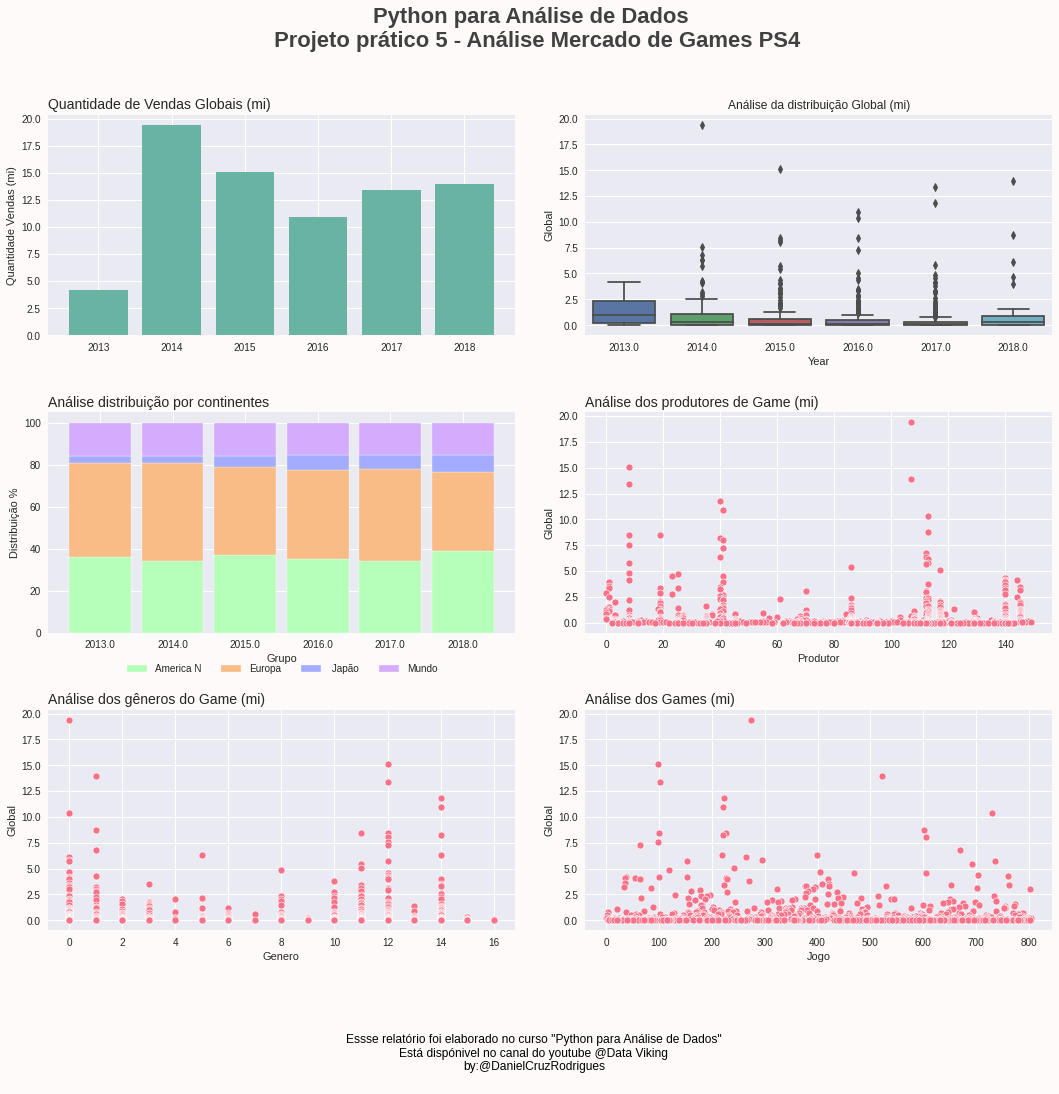

In [ ]:
# Relatorio --> Report para o Chefe
#0 - Action  12 - Shooter   1 - Aventura   40- Esportes

# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#FFFAFA'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use("seaborn")

# Titulo da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid 
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( df['Year'], df['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (mi)')
# Plot
sns.boxplot( data=df, x='Year', y='Global')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=df, x='Produtor', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 5

plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos gêneros do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Genero', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[0] );


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Essse relatório foi elaborado no curso "Python para Análise de Dados"
Está dispónivel no canal do youtube @Data Viking
by:@DanielCruzRodrigues
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='black');

In [ ]:
#0,2,4,6,8,10,12,14,16